# Validating Hubble's Law with Hacker Stats in Python


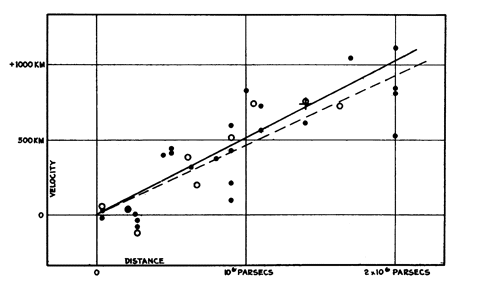

In [1]:
from IPython.display import Image
Image(filename='images/Linear Model in Cosmology.png') 

Hubble's graph of recessional velocity versus distance. (Hubble, Proceedings of the National Academy of Sciences, 1929, 15, 168)

https://www.pnas.org/content/15/3/168

## Hubble's Law

In “A relation between distance and radial velocity among extra-galactic nebulae,” Edwin Hubble provided evidence for one of science’s greatest discoveries: the expanding universe. Hubble demonstrated that galaxies are moving away from Earth with a velocity that is correlated to their distance from earth.  In other words, galaxies that are further away from Earth move away faster than nearby galaxies. This is known as Hubble's Law.  Hubble’s classic graph of observed velocity vs. distance for nearby galaxies presented above, visualizes this phenomenon. This graph has become a scientific landmark as it shows the linear relationship between galaxy velocity (v) and its distance (d):

Here v is the galaxy's radial velocity and d is the galaxy's distance from Earth.  H0 is an observationally determined constant called Hubble's constant.

https://www.pnas.org/content/112/11/3173#F1

Hubble's Law was the first credible evidence for a new theory on the origin of the Universe proposed by Georges Lemaitre: the Big Bang. Hubble achieved scientific superstardom for his discoveries and is still considered a brilliant observational astronomer.

https://www.khanacademy.org/humanities/big-history-project/big-bang/how-did-big-bang-change/a/edwin-hubble

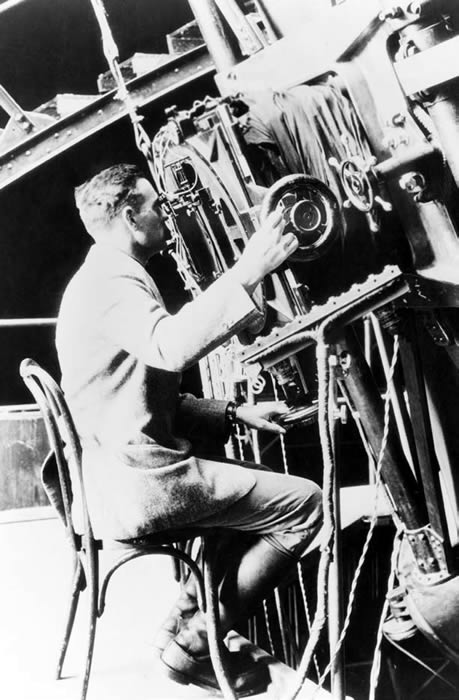

In [2]:
from IPython.display import Image
Image(filename='images/hubble used the hooker telescope.jpg') 

Hubble used the Hooker Telescope at Mount Wilson Observatory for some of his most important discoveries. © Emilio Segrè Visual Archives / American Institute of Physics / Photo Researchers, Inc.


It should be noted that Einstein's theory predicts departures from a strictly linear Hubble law. The amount of departure, and the type, depends on the value of the total mass of the universe. Such a plot of radial velocity vs. distance, can inform us about the total amount of matter in the universe.  It might also provide crucial information about the mysterious dark matter...

https://starchild.gsfc.nasa.gov/docs/StarChild/questions/redshift.html

Hubble’s remarkable feat was obtained using a very small sample of measurements of velocities and distances for 24 nearby galaxies. The distances to these galaxies had been inaccurately measured by Hubble from the visible brightness of their stars and from their galactic brightness. In addition to plotting all of the individual 24 galaxies in the graph, Hubble also grouped them into nine clusters (open circles in Hubble's graph) based on their closeness in direction and distance, as a means of minimizing the scatter. Hubble’s experiment was the definitive work that convinced the scientific community of the existence of this observed phenomenon: the expanding universe.

Hubble’s diagram of velocity vs. distance shows a clear trend of increasing velocity with distance. What makes this graph astonishing is the far-reaching implications of the observed trend: we live in a large, dynamically evolving universe that is expanding in all directions around us. It is not the static universe that Einstein and others assumed in 1917. In fact, Einstein introduced a cosmological constant into his equations to keep the universe static, as it was then believed to be. To the contrary, Hubble results suggested that the universe has been expanding for billions of years, from an early beginning to the present (and future) time. 

https://www.pnas.org/content/112/11/3173#F1

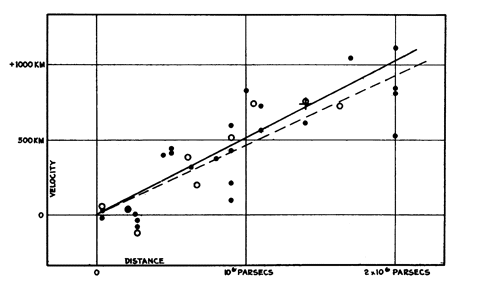

In [3]:
from IPython.display import Image
Image(filename='images/Linear Model in Cosmology.png') 

Hubble's graph of recessional velocity versus distance. (Hubble, Proceedings of the National Academy of Sciences, 1929, 15, 168)

Even though Hubble’s results observed the beautiful linear relationship, Hubble’s values for his distances in 1929 were, however, too small by a factor of ~7.  The expansion rate Ho was also too large by the same factor. However, despite this large imprecision and its major implications for the expansion rate and age of the universe, Hubble’s fundamental discovery of the expanding universe is not affected.  The underlying linear v ∼ d relationship continues to hold true!

https://www.pnas.org/content/112/11/3173#F1

## Experimental Design (Methodology)
- EDA
- Correcting distance by a factor of 7.
- OLS using original Hubble dataset of 24 measurements.
- Pairs Bootstrap
- Hypothesis Test --> measure effect of distance on Recession velocities

In this post, I'm going to attempt to validate Hubble's Law with the original dataset he used with 24 measurements to run an Ordinary Least Squares Linear Regression, correcting the values of his distances by a factor 7.  Then, I will use a Pairs Bootstrap Resampling of the dataset to calculate the RSS Minima and perform a Hypothesis Test on the measured effect of distance on recessional velocities of galaxies. Let's get started!

In [4]:
from hacker_ols import (load_hubble_data, normalize_deviations, plot_deviations,
                  plot_regplot, pearson_r, least_squares_sm, rss_rmse,
                  plot_prob_residuals, plot_hist_expected_ci, plot_linreg,
                  draw_bs_pairs_linreg, conf_int95, distr_mean_stde, 
                  rss_minima_viz, test_statistic, shuffle_and_split,
                  t_test, plot_effect_size)

## About the Data

Source: "A relation between distance and radial velocity among extra-galactic nebulae" by Edwin Hubble
PNAS March 15, 1929 15 (3) 168-173; https://doi.org/10.1073/pnas.15.3.168
Communicated January 17, 1929

Column Names

- Object Name: Name of galaxy.
- Distance [Mpc]: Distance from Earth in megaparsecs. Notes on units: 1 parsec = 3.26 light years, 1 Mpc = megaparsec = 10 parsecs.
- Velocity [Km/second]: Recessional velocity, how fast galaxy is moving away from Earth.

## Import Data

In [5]:
df = load_hubble_data()

## EDA

The first thing we will do is look at the normalized deviations of distances and recessional velocities to assess the correlation visually. The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both.

### Normalized Deviations

In [6]:
d_velocity, d_distance, z_velocity, z_distance = normalize_deviations(x=df['distances'], y=df['velocities'])

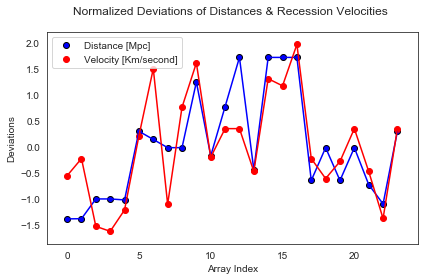

In [7]:
plot_deviations(x=z_velocity, 
                y=z_distance, 
                plt_title='Normalized Deviations of Distances & Recession Velocities \n',
                xlabel='Distance [Mpc]',
                ylabel='Velocity [Km/second]')

Just as we were informed, the two normalized arrays of deviations are highly correlated. Let's adjust the distance values and inspect the correlation afterwards.

### Adjust distances by Factor of 7

Now we are going to correct the distance values by multiplying by a factor of 7.  Let's look at the result of our adjustment.

In [8]:
df['distances7'] = df['distances']*7

In [9]:
df[['distances','distances7','velocities']].describe()

,distances,distances7,velocities
count,24.000000,24.000000,24.000000
mean,0.911375,6.379625,373.125000
std,0.645496,4.518470,371.254666
min,0.032000,0.224000,-220.000000
25%,0.406250,2.843750,165.000000
50%,0.900000,6.300000,295.000000
75%,1.175000,8.225000,537.500000
max,2.000000,14.000000,1090.000000


We can see that while our corrected variable of distance did increase by a factor of 7, velocity and distance still seem to be correlated.  We can see how big of an effect our adjustment had by visualizing the correlation in a scatter plot.

### Correlation

In [10]:
cor = pearson_r(x=df['distances7'], y=df['velocities'])

Correlation (pearson r): 0.79


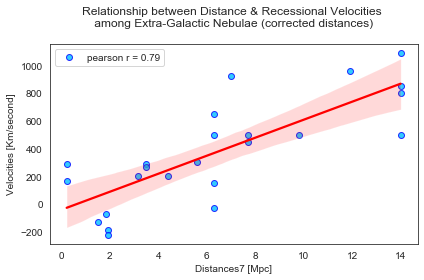

In [11]:
plot_regplot(
    x='distances7', 
    y='velocities',
    data=df,
    xlabel='Distances7 [Mpc]',
    ylabel='Velocities [Km/second]', 
    legend='pearson r = {:.02f}'.format(cor),
    plt_title='Relationship between Distance & Recessional Velocities \n among Extra-Galactic Nebulae (corrected distances) \n'
)

We can see that the data exhibits a strong linear correlation with a Pearson Correlation Coefficient of .79.  This graph doesn't look much different than the one that Hubble created, aside from the fact that we corrected the distances by a factor of 7. Let's run an Ordinary Least Squares Linear Regression to furtherunderstand this relationship.

## OLS

In [12]:
model7 = least_squares_sm(x='distances7', formula="velocities ~ distances7", df=df)

For slope a1=64.88, the uncertainty in a1 is 10.75

For intercept a0=-40.78, the uncertainty in a0 is 83.44

                            OLS Regression Results                            
Dep. Variable:             velocities   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     36.44
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           4.48e-06
Time:                        15:42:12   Log-Likelihood:                -163.83
No. Observations:                  24   AIC:                             331.7
Df Residuals:                      22   BIC:                             334.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [13]:
print('R2: {:.02f}'.format(model7.rsquared))

R2: 0.62


For every unit increase in distance, recessional velocity increases by 64.88 km per second.

R-squared could be interpreted as 62% of the variance of velocities are explained by distance.  

We've already validated Hubble's Law with a couple of lines of Python code.  We examined correlation and concluded with enough confidence that the majority of variance can be explained by the model.  Technically, we could stop at this point and call it day.  But let's take it a step further and understand the residuals like any good scientist would.

### Residual Sum of the Squares

In [14]:
y_model = model7.predict(df)

In [15]:
RSS, residuals, MSE, RMSE = rss_rmse(
    y_data=df['velocities'],
    y_model=y_model,
    model_intercept=model7.params['Intercept'],
    model_slope=model7.params['distances7']
)

RMSE = 222.99, MSE = 49726.77, RSS = 1193442.37
Parameters a0=-40.78364909586052, a1=64.87977727466124 yield RSS=1193442.37


If we can interpret r-squared as the variances that might be explained by our OLS model, the residual sum of squares (RSS) represents the variances or errors that are not explained.

The solution of OLS regression is the set of coefficient values for which the RSS is minimal.  We'll revisit this topic in the exercise when we look at bootstrap resampling.

Here we have Root Mean Square Error (RMSE) of about 223, which can be interpreted as the spread of prediction errors, or how concentrated the data is around the line of best fit.  Now we will use a probablity plot to visualize the spread of residuals.

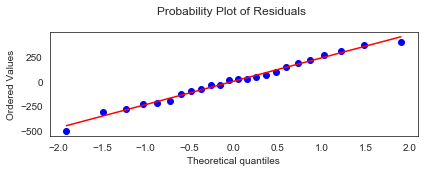

In [16]:
plot_prob_residuals(residuals=residuals)

The probability plot of the residuals of our OLS model are approximately linear, supporting the condition that the error terms are normally distributed.

Again we could also stop right here, but we're going to keep moving and generate some bootstrap replicates to validate some of the conclusions we've witnessed from OLS Regression and uncover a couple of our own.

## Resampling with Bootstrap Pairs

Pairs bootstrap involves resampling pairs of data with replacement. Each collection of pairs fit with a regression model. We do this again and again, getting bootstrap replicates of the explanatory and dependent variables, as well as the parameter values for the OLS model.

The goal is to use bootstrap resampling to compute one mean for each resample and create a distribution of sample means, and then compute the standard error as a way to quantify the "uncertainty" in the sample statistic as an estimator for the population statistic.  This comes in very handy since we don't have an idea of the population mean or standard deviation, we will use bootstrap resampling to infer it.

According to the central limit theoreom, if we generate enough replicates the resampled distributions will follow a normal distribution, which is one of the assumptions for a hypothesis test.  We're going to generate 1000 data points for both of the variables, x and y.

In [17]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_means_dist, bs_means_veloc, bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
    x=df['distances7'], 
    y=df['velocities'], 
    size=1000
)

[4.78075208 8.16361146]

Bootstrap Distribution: center=6.47, spread=0.90



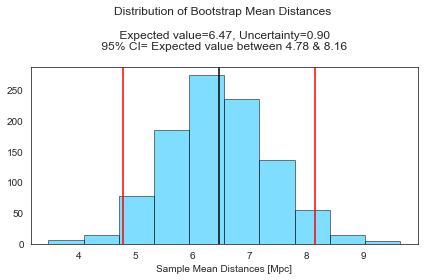

In [18]:
# Compute and print 95% CI for distances expected value
dist_ci95 = conf_int95(np_array=bs_means_dist)

# compute expected value and uncertainty
expected_value, uncertainty = distr_mean_stde(distribution=bs_means_dist) 

# plot histogram
plot_hist_expected_ci(
    data=bs_means_dist,
    distribution_mean=expected_value,
    ci=dist_ci95,
    plt_title='Distribution of Bootstrap Mean Distances \n \n Expected value={:0.02f}, Uncertainty={:0.02f} \n 95% CI= Expected value between {:0.02f} & {:0.02f}'.format(expected_value, uncertainty, dist_ci95[0], dist_ci95[1]), 
    data_label='Sample Mean Distances [Mpc]',
    kde=False,
    bins=10
)

We inferred that the expected average value of distances is 6.47 with an uncertainty of .9.  This is really close to the sample mean and standard deviation that we generated early on.  In addition, we can infer with 95% confidence that the true population average lies somewhere between 4.78 and 8.16.

Notice we have a black line in the middle to mark the expected value.  Uncertainty here is just one measure of spread of the distribution of sample means.  Moreover, notice the uncertainty we computed also fits inside the confidence interval. Think of the uncertainty here as the 'one sigma' confidence interval.

In addition, the vertical red lines mark 5th (left) and 95th (right) percentiles mark the extent of the confidence interval to find the range of values containing the inner 95% of the sample means.

[237.69791667 526.26041667]

Bootstrap Distribution: center=377.58, spread=73.54



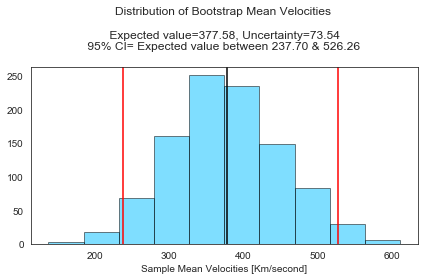

In [19]:
# Compute and print 95% CI for velocity expected value
veloc_ci95 = conf_int95(np_array=bs_means_veloc)

# compute expected value and uncertainty
expected_value, uncertainty = distr_mean_stde(distribution=bs_means_veloc) 

# plot histogram
plot_hist_expected_ci(
    data=bs_means_veloc,
    distribution_mean=expected_value,
    ci=veloc_ci95,
    plt_title='Distribution of Bootstrap Mean Velocities \n \n Expected value={:0.02f}, Uncertainty={:0.02f} \n 95% CI= Expected value between {:0.02f} & {:0.02f}'.format(expected_value, uncertainty, veloc_ci95[0], veloc_ci95[1]), 
    data_label='Sample Mean Velocities [Km/second]', 
    kde=False,
    bins=10
)

Similarly for velocities, We inferred that the expected average value of velocities is 377.58 with an uncertainty of 73.54.  In addition, we can infer with 95% confidence that the true population average lies somewhere between 237.7 and 526.26.

Now we're going to conduct a similar exercise, this time with the model slope and intercept parameters.  That's right!  You can also use bootstrap re-sampling to compute the estimate, standard error and confidence interval for OLS model parameters, again all thanks to the central limit thereom.  We're basically going to use the each pairs bootstrap replicate generated as an input into an OLS modle to generate bootstrap slopes and intercepts.  Let's give it a try.

[46.33035669 87.33859793]

Bootstrap Distribution: center=65.17, spread=10.33



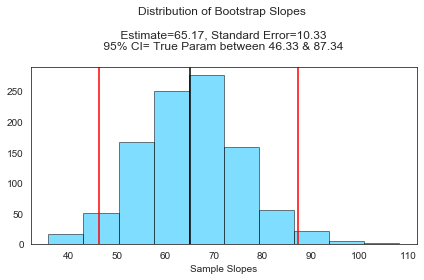

In [20]:
# Compute and print 95% CI for slope
slope_ci95 = conf_int95(np_array=bs_slope_reps)

# compute estimate and standard error
slope_estimate, slope_se = distr_mean_stde(distribution=bs_slope_reps) 

# plot histogram
plot_hist_expected_ci(
    data=bs_slope_reps, 
    plt_title='Distribution of Bootstrap Slopes \n \n Estimate={:0.02f}, Standard Error={:0.02f} \n 95% CI= True Param between {:0.02f} & {:0.02f}'.format(slope_estimate, slope_se, slope_ci95[0], slope_ci95[1]), 
    distribution_mean=slope_estimate,
    ci=slope_ci95,
    data_label='Sample Slopes',
    kde=False,
    bins=10
)

We inferred the slope estimate is 65.17 with a standard error of 10.33.  We are 95% confident that the true slope lies somewhere between 46.33 and 87.34.

Note that this is very similar to the summary output of a statsmodels ols() linear regression model.

[-200.98574668  104.23141337]

Bootstrap Distribution: center=-43.23, spread=78.44



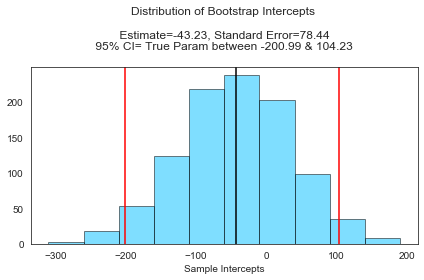

In [21]:
# Compute and print 95% CI for intercept
intercept_ci95 = conf_int95(np_array=bs_intercept_reps)

# compute estimate and standard error
intercept_estimate, intercept_se = distr_mean_stde(distribution=bs_intercept_reps)

# plot histogram
plot_hist_expected_ci(
    data=bs_intercept_reps, 
    plt_title='Distribution of Bootstrap Intercepts \n \n Estimate={:0.02f}, Standard Error={:0.02f} \n 95% CI= True Param between {:0.02f} & {:0.02f}'.format(intercept_estimate, intercept_se, intercept_ci95[0], intercept_ci95[1]),
    distribution_mean=intercept_estimate,
    ci=intercept_ci95,
    data_label='Sample Intercepts',
    kde=False,
    bins=10
)

We inferred the intercept estimate is -43.23 with a standard error of 78.44.  We are 95% confident that the true intercept lies somewhere between -200.99 and 104.23.

Now we're going to generate the RSS Minima via Resampling with Pairs Bootstrap.

## Visualizing the RSS Minima with Resampling

Recall when we looked at RSS, the solution of OLS is the set of coefficient values for which the RSS is minimal.  Now we're going to use the same replicates we generated to visualize the RSS Minima. Then we're going to retrieve the model parameters (slope and intercept) and the RSS Minima. 

RMSE = 237.03, MSE = 56184.77, RSS = 1348434.43
Parameters a0=-24.581333548699718, a1=64.3819155119536 yield RSS=1348434.43

RMSE = 212.81, MSE = 45289.72, RSS = 1086953.34
Parameters a0=-73.07541541222048, a1=73.5485180818052 yield RSS=1086953.34

RMSE = 237.08, MSE = 56206.81, RSS = 1348963.32
Parameters a0=-68.82829970680751, a1=72.07244107793751 yield RSS=1348963.32

RMSE = 233.11, MSE = 54342.53, RSS = 1304220.64
Parameters a0=40.53354563297171, a1=50.723820936787334 yield RSS=1304220.64

RMSE = 269.98, MSE = 72887.27, RSS = 1749294.47
Parameters a0=-8.941007009063412, a1=65.94020818188253 yield RSS=1749294.47

RMSE = 199.10, MSE = 39642.79, RSS = 951426.92
Parameters a0=-159.71683833788077, a1=78.2862436133994 yield RSS=951426.92

RMSE = 275.67, MSE = 75991.49, RSS = 1823795.71
Parameters a0=16.65908459677354, a1=54.32949424532318 yield RSS=1823795.71

RMSE = 236.65, MSE = 56002.71, RSS = 1344065.06
Parameters a0=43.31126440386936, a1=59.25970921597256 yield RSS=1344065.06

RMSE 

RMSE = 188.70, MSE = 35606.76, RSS = 854562.14
Parameters a0=-62.00942226499461, a1=70.94792943641366 yield RSS=854562.14

RMSE = 196.96, MSE = 38794.53, RSS = 931068.69
Parameters a0=-5.772902092626111, a1=64.41296445163799 yield RSS=931068.69

RMSE = 190.93, MSE = 36453.16, RSS = 874875.89
Parameters a0=29.24918449807558, a1=40.01041999017591 yield RSS=874875.89

RMSE = 256.52, MSE = 65803.04, RSS = 1579272.86
Parameters a0=-8.20888862759142, a1=66.9486646909486 yield RSS=1579272.86

RMSE = 202.64, MSE = 41064.24, RSS = 985541.86
Parameters a0=-156.86213935965424, a1=108.21635579974834 yield RSS=985541.86

RMSE = 224.64, MSE = 50463.81, RSS = 1211131.43
Parameters a0=-22.318156477655236, a1=63.245044940483496 yield RSS=1211131.43

RMSE = 221.58, MSE = 49098.01, RSS = 1178352.20
Parameters a0=36.137009845499335, a1=64.79205227983687 yield RSS=1178352.20

RMSE = 216.49, MSE = 46869.10, RSS = 1124858.30
Parameters a0=-91.83430649831666, a1=65.41604186485016 yield RSS=1124858.30

RMSE = 

RMSE = 210.71, MSE = 44397.34, RSS = 1065536.16
Parameters a0=19.90392067495634, a1=50.5188132803459 yield RSS=1065536.16

RMSE = 169.84, MSE = 28846.24, RSS = 692309.76
Parameters a0=-121.58877783351994, a1=67.45318124934533 yield RSS=692309.76

RMSE = 167.15, MSE = 27939.72, RSS = 670553.29
Parameters a0=-183.2718398045712, a1=80.4833800213534 yield RSS=670553.29

RMSE = 139.18, MSE = 19370.41, RSS = 464889.79
Parameters a0=-140.44388041705423, a1=82.52391940519239 yield RSS=464889.79

RMSE = 201.63, MSE = 40652.75, RSS = 975666.08
Parameters a0=-50.29887159048951, a1=71.12378469238374 yield RSS=975666.08

RMSE = 183.15, MSE = 33544.81, RSS = 805075.54
Parameters a0=-19.177171566351774, a1=57.88659270961201 yield RSS=805075.54

RMSE = 228.11, MSE = 52033.24, RSS = 1248797.71
Parameters a0=-67.8983812783161, a1=59.921306496703785 yield RSS=1248797.71

RMSE = 186.58, MSE = 34811.36, RSS = 835472.72
Parameters a0=-154.68555770436956, a1=82.40049766803561 yield RSS=835472.72

RMSE = 232.

RMSE = 224.39, MSE = 50352.50, RSS = 1208460.09
Parameters a0=15.555398301932371, a1=52.50460900187618 yield RSS=1208460.09

RMSE = 245.53, MSE = 60283.42, RSS = 1446802.18
Parameters a0=-81.56398438964538, a1=67.06001794350664 yield RSS=1446802.18

RMSE = 199.33, MSE = 39730.85, RSS = 953540.41
Parameters a0=-77.075849526983, a1=60.69277942449824 yield RSS=953540.41

RMSE = 247.10, MSE = 61057.72, RSS = 1465385.37
Parameters a0=43.145425386031036, a1=57.08063928198496 yield RSS=1465385.37

RMSE = 190.73, MSE = 36377.11, RSS = 873050.67
Parameters a0=-169.70867859695184, a1=75.01827462384321 yield RSS=873050.67

RMSE = 221.15, MSE = 48907.86, RSS = 1173788.58
Parameters a0=25.004012983839857, a1=63.929899815552595 yield RSS=1173788.58

RMSE = 252.23, MSE = 63619.24, RSS = 1526861.81
Parameters a0=-99.00193621269062, a1=76.11126330093256 yield RSS=1526861.81

RMSE = 160.12, MSE = 25638.10, RSS = 615314.31
Parameters a0=-197.9462826987259, a1=78.66992619869472 yield RSS=615314.31

RMSE =

RMSE = 196.44, MSE = 38588.40, RSS = 926121.51
Parameters a0=77.60565576973664, a1=53.00577845462811 yield RSS=926121.51

RMSE = 169.04, MSE = 28574.05, RSS = 685777.11
Parameters a0=-25.3971933072757, a1=68.51955705057433 yield RSS=685777.11

RMSE = 218.05, MSE = 47546.69, RSS = 1141120.68
Parameters a0=-230.29700857606053, a1=88.57906570344045 yield RSS=1141120.68

RMSE = 225.84, MSE = 51003.45, RSS = 1224082.88
Parameters a0=123.3417693297472, a1=39.213663229339346 yield RSS=1224082.88

RMSE = 206.39, MSE = 42597.13, RSS = 1022331.06
Parameters a0=-60.961366333496244, a1=68.23463387177547 yield RSS=1022331.06

RMSE = 186.47, MSE = 34769.48, RSS = 834467.60
Parameters a0=-285.8562645516601, a1=93.48924466596992 yield RSS=834467.60

RMSE = 191.92, MSE = 36832.81, RSS = 883987.35
Parameters a0=-103.69803749125981, a1=64.6477523533684 yield RSS=883987.35

RMSE = 212.84, MSE = 45301.62, RSS = 1087238.83
Parameters a0=182.01857631095726, a1=39.2623056072649 yield RSS=1087238.83

RMSE = 18

RMSE = 180.22, MSE = 32480.84, RSS = 779540.26
Parameters a0=-132.54909024252794, a1=88.95370533360655 yield RSS=779540.26

RMSE = 205.98, MSE = 42426.69, RSS = 1018240.66
Parameters a0=-133.99807601837148, a1=68.30048193596159 yield RSS=1018240.66

RMSE = 164.64, MSE = 27106.54, RSS = 650557.03
Parameters a0=53.85985275869422, a1=56.0456918465533 yield RSS=650557.03

RMSE = 219.79, MSE = 48305.77, RSS = 1159338.46
Parameters a0=-61.5261074502946, a1=63.94458128867249 yield RSS=1159338.46

RMSE = 224.08, MSE = 50210.34, RSS = 1205048.25
Parameters a0=60.50567559669571, a1=49.15385072705706 yield RSS=1205048.25

RMSE = 188.87, MSE = 35672.03, RSS = 856128.71
Parameters a0=-132.49061985116032, a1=67.93491495301527 yield RSS=856128.71

RMSE = 221.92, MSE = 49250.05, RSS = 1182001.11
Parameters a0=-121.59812512264392, a1=70.95955857934185 yield RSS=1182001.11

RMSE = 253.52, MSE = 64272.43, RSS = 1542538.20
Parameters a0=-31.177794976010887, a1=69.49349108736563 yield RSS=1542538.20

RMSE 

RMSE = 180.27, MSE = 32497.50, RSS = 779940.05
Parameters a0=94.41969369536866, a1=54.81661803028954 yield RSS=779940.05

RMSE = 226.44, MSE = 51276.53, RSS = 1230636.77
Parameters a0=-38.25820599757827, a1=64.63420984386975 yield RSS=1230636.77

RMSE = 174.66, MSE = 30507.70, RSS = 732184.70
Parameters a0=-41.649252526904604, a1=59.13768355489444 yield RSS=732184.70

RMSE = 213.72, MSE = 45674.17, RSS = 1096180.16
Parameters a0=-18.0925804396079, a1=61.12654134287601 yield RSS=1096180.16

RMSE = 198.06, MSE = 39227.75, RSS = 941466.02
Parameters a0=10.952670790884213, a1=60.778857262058516 yield RSS=941466.02

RMSE = 188.56, MSE = 35555.25, RSS = 853326.00
Parameters a0=49.88837755798431, a1=56.008060373133105 yield RSS=853326.00

RMSE = 234.30, MSE = 54896.63, RSS = 1317519.07
Parameters a0=-87.17881368075967, a1=65.86983448088097 yield RSS=1317519.07

RMSE = 208.69, MSE = 43550.29, RSS = 1045206.96
Parameters a0=-81.79442796856449, a1=69.55600481126446 yield RSS=1045206.96

RMSE = 2

RMSE = 181.28, MSE = 32863.40, RSS = 788721.69
Parameters a0=-77.80068007329513, a1=67.49132285002801 yield RSS=788721.69

RMSE = 197.37, MSE = 38956.67, RSS = 934960.09
Parameters a0=-53.20552298283911, a1=73.89581918393515 yield RSS=934960.09

RMSE = 282.80, MSE = 79975.17, RSS = 1919404.03
Parameters a0=-24.7399078266846, a1=66.43974727100074 yield RSS=1919404.03

RMSE = 215.03, MSE = 46238.57, RSS = 1109725.58
Parameters a0=8.536487729080989, a1=58.25315328304434 yield RSS=1109725.58

RMSE = 184.45, MSE = 34022.46, RSS = 816539.00
Parameters a0=42.22233479840213, a1=48.39173084140281 yield RSS=816539.00

RMSE = 205.00, MSE = 42026.92, RSS = 1008646.02
Parameters a0=31.629963461767034, a1=58.472381337938906 yield RSS=1008646.02

RMSE = 198.45, MSE = 39380.45, RSS = 945130.82
Parameters a0=-157.92422544670598, a1=84.9828476815862 yield RSS=945130.82

RMSE = 244.34, MSE = 59702.69, RSS = 1432864.68
Parameters a0=-0.33234459339587374, a1=61.60475493527974 yield RSS=1432864.68

RMSE = 2

RMSE = 219.27, MSE = 48077.45, RSS = 1153858.77
Parameters a0=-86.47025693571402, a1=70.30868651742739 yield RSS=1153858.77

RMSE = 144.89, MSE = 20992.04, RSS = 503808.96
Parameters a0=100.41165296851415, a1=49.07225075988098 yield RSS=503808.96

RMSE = 224.35, MSE = 50332.20, RSS = 1207972.82
Parameters a0=-52.006082120678286, a1=60.918163250806245 yield RSS=1207972.82

RMSE = 240.16, MSE = 57676.16, RSS = 1384227.89
Parameters a0=-2.888880471033019, a1=67.09992691724025 yield RSS=1384227.89

RMSE = 208.84, MSE = 43613.60, RSS = 1046726.38
Parameters a0=-141.12482642438312, a1=73.4592053724086 yield RSS=1046726.38

RMSE = 175.49, MSE = 30796.76, RSS = 739122.31
Parameters a0=122.49525360834969, a1=48.81415648185702 yield RSS=739122.31

RMSE = 261.45, MSE = 68354.45, RSS = 1640506.73
Parameters a0=-84.96225608670358, a1=78.02898694935418 yield RSS=1640506.73

RMSE = 224.98, MSE = 50615.12, RSS = 1214763.00
Parameters a0=33.34340948928883, a1=56.03639641646101 yield RSS=1214763.00

RMS

RMSE = 218.35, MSE = 47676.10, RSS = 1144226.46
Parameters a0=-107.95252258241271, a1=72.73851537809263 yield RSS=1144226.46

RMSE = 186.17, MSE = 34661.01, RSS = 831864.15
Parameters a0=-130.66246480943425, a1=80.68302347423351 yield RSS=831864.15

RMSE = 227.66, MSE = 51831.14, RSS = 1243947.39
Parameters a0=2.7430306315840767, a1=55.048666777960946 yield RSS=1243947.39

RMSE = 188.95, MSE = 35703.60, RSS = 856886.51
Parameters a0=-5.502180631262547, a1=60.461227601716466 yield RSS=856886.51

RMSE = 156.64, MSE = 24537.14, RSS = 588891.47
Parameters a0=-102.00851319457018, a1=75.95617869358554 yield RSS=588891.47

RMSE = 170.80, MSE = 29172.11, RSS = 700130.75
Parameters a0=-0.815957051235614, a1=67.77401887668705 yield RSS=700130.75

RMSE = 181.15, MSE = 32815.89, RSS = 787581.41
Parameters a0=-2.020588124072674, a1=59.07451371482445 yield RSS=787581.41

RMSE = 197.53, MSE = 39018.60, RSS = 936446.40
Parameters a0=-207.72017428956093, a1=92.80286658799713 yield RSS=936446.40

RMSE =

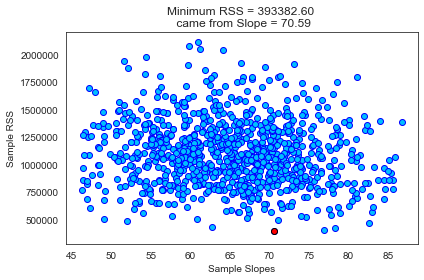

In [22]:
best_rss_df = rss_minima_viz(
    x=df['distances7'], 
    y=df['velocities'],
    slope_ci95=slope_ci95, 
    intercept_ci95=intercept_ci95,
    size=1000
)

Great job! The best slope and intercept are the ones out of arrays of slopes and intercepts that yielded the minimum RSS value.  Note that behind the scenes, we used the confidence intervals we generated early to filter out RSS values that didn't fall into our range of parameter values.

Now that we have the RSS Minima, and the model parameters that yielded it, we can visualize the new model with a scatter plot.

In [23]:
rss_predictions = best_rss_df['Bootstrap Intercepts'].values[0] + (best_rss_df['Bootstrap Slopes'].values[0] * df['distances7'])

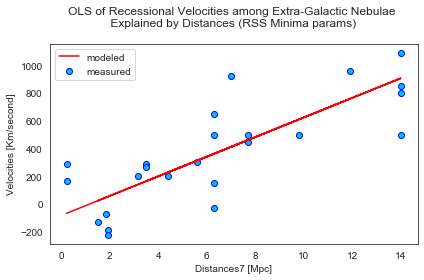

In [24]:
plot_linreg(
    x=df['distances7'], 
    y=df['velocities'], 
    predictions=rss_predictions,
    plt_title='OLS of Recessional Velocities among Extra-Galactic Nebulae \n Explained by Distances (RSS Minima params) \n',
    xlabel='Distances7 [Mpc]',
    ylabel='Velocities [Km/second]'
)

If we compare this to the scatter plot we generated early (during EDA), notice that there's a slight difference upon inspection as the red line doesn't pass through the second nebulae at 14 mpc, but rather is slightly above it.  We can consider this an improvement in the overall fit of model! 

In the final chapter, we will conduct a hypothesis test to examine the theory that short and long distances have an effect on the Radial Velocities.  We've already used a number of tools in our hacker stats toolbox to validate Hubble's Law.  Let's put the finishing touches on the icing of the cake!

## Hypothesis Test

Recall that we used the assumption of the central limit theoreom to generate enough replicates to obtain paired distributions that are normal, which is one of the assumptions required for a hypothesis test.

Now we are going to test whether the length of distance has an effect on velocity.  We will define short an long distances of nebullae from our planet.  Then we will resample and shuffle the velocities and take the mean difference as a test statistic.  In other words if the shuffled resamples have a difference in effect (or the mean velocities) then we can reject the null hypotehesis, concluding with enough power that the results are statistically significant.  

See the null and alternative hypotheses below:

### Null Hypothesis
- the length of distance has no effect on the recessional velocities of Extra Gallactic Nebullae

### Alternative Hypothesis
- the length of distance has an effect on the recessional velocities of Extra Gallactic Nebullae

### Assumptions

For our experiment, we will use a 95% significance level, which will make our alpha value 0.05.  We define short distances as distances less than 7 Mpc; Conversely we define long distances as distances that are greater or equal to 7 Mpc.

We're also going to use a t-test, since we do not know the true standard deviation of the population.

The test statistic is the difference between a velocity drawn from shorter distances and one drawn from longer distances. The distribution of difference values is built up by subtracting each point in the short range with one from the long range to see if the mean difference is not equal to zero, also known the effect size.

In [25]:
# Shuffle an Resample the distances
shuffle_resample1, shuffle_resample2 = shuffle_and_split(
    short_distances=df[df['distances7'] < 7]['velocities'],
    long_distances=df[df['distances7'] >= 7]['velocities'],
    size=1000
)

In [26]:
# Calculate the test statistic distribution, effect size and standard error
shuffled_test_statistic_dist, shuffled_effect_size, shuffled_standard_error = test_statistic(
    resample1=shuffle_resample1, 
    resample2=shuffle_resample2
)

Test Statistic: Effect Size=83.76, Standard Error=495.48


In [27]:
# Run the t-test
_, p_value = t_test(
    sample1=shuffle_resample1, 
    sample2=shuffle_resample2
)

The P-value is = 0.00000011



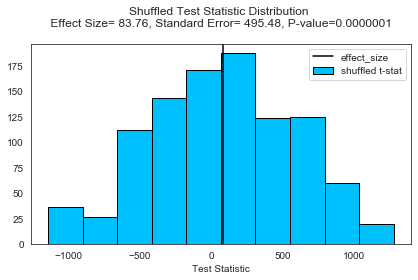

In [29]:
plot_effect_size(
    test_statistic_dist=shuffled_test_statistic_dist, 
    effect_size=shuffled_effect_size, 
    plt_title='Shuffled Test Statistic Distribution \n Effect Size= {:0.2f}, Standard Error= {:0.2f}, P-value={:0.7f} \n'.format(shuffled_effect_size, shuffled_standard_error, p_value),
    data_label='Test Statistic'
)

The mean of the test statistic is not zero, which tells us that there is on average a difference in velocity when comparing short and long distances. In other words, galaxies that are closer to Earth are moving away at a much slower rate than galaxies that are a lot further away from Earth.  Again, we call this the 'effect size'. The increase in distance had an effect on velocity. The standard error of the test statistic distribution is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.

Notice that our effect size is not exactly zero because there is noise in the data.  It's also worthwhile to note that shuffling has an effect on the randomness of our experimetn.  We shuffled the data in order to make sure that each sample is composed of random and independent data points.  If we didn't shuffle the data that then the effect size would be much greater due the time ordered effect on the mean.

Outstanding! Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect. The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. Distance is correlated to time.



Our P-value is extremely small: 0.0000001.  So we can conclude with very high statistical signficance that distance does indeed have an effect on the velocity of galaxies, which is concrete evidence for Hubble's Law that the unvierse is constantly expanding.  

## Next Steps
- Use 22 estimated distances for T-test
- Identify Nebulae Clusters with KMeans
- Use other data of galaxy distances & recessional velocities...